# Gradient Boosting

Gradient boosting consists of sequentially building decision trees on the residuals of the previous model and using the predictions of this new tree to additively update the prediction of the previous model. Therefore, gradient boosting builds an additive models that attempts to progressively reduce the errors of the predictions and the overall loss of the latest model.

The residuals of each tree represent the direction in which the model’s predictions need to change to reduce the loss — just like a negative gradient in numerical optimization.

![](doc/img/gradient_boosting/gradient_boosting_algo_illustration.png)

![](doc/img/gradient_boosting/gradient_boosting_algo.png)

where $\gamma$ denotes the prediction of the decision tree

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt

In [4]:
iris_data= load_iris()
full_data = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)

full_data["sepal_length_category"] = np.where(full_data['sepal length (cm)'] < 5, "0", "1")
full_data["sepal_length_category"] = np.where(full_data['sepal length (cm)'] >= 6 , "2", full_data['sepal_length_category'])

full_data["petal_length_category"] = np.where(full_data['petal length (cm)'] < 2, "0", "1")
full_data["petal_length_category"] = np.where(full_data['petal length (cm)'] >= 5 , "2", full_data['petal_length_category'])

full_data.drop(columns = ["sepal length (cm)", "petal length (cm)"], inplace = True)
full_data["Iris"] = iris_data.target

In [11]:
full_data

,sepal width (cm),petal width (cm),sepal_length_category,petal_length_category,Iris
0,3.5,0.2,1,0,0
1,3.0,0.2,0,0,0
2,3.2,0.2,0,0,0
3,3.1,0.2,0,0,0
4,3.6,0.2,1,0,0
...,...,...,...,...,...
145,3.0,2.3,2,2,2
146,2.5,1.9,2,2,2
147,3.0,2.0,2,2,2
148,3.4,2.3,2,2,2


## Regression

Initialize model with constant value : $$F_{0}(x)=argmin(\gamma) \sum_{i=1}^{n}{L(y_{i}, \gamma})$$

This comes down to finding the predicted value $\gamma$ that minimizes the loss function, in this case, the mean squared error. Turns out this is simply the mean of y.

In [21]:
y = full_data["sepal width (cm)"]
f_0 = y.mean()

In [ ]:
f_0

AttributeError: module 'matplotlib.pyplot' has no attribute 'line'

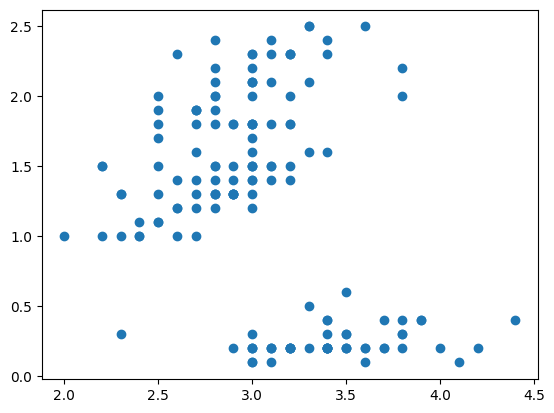

In [20]:
plt.scatter(y, full_data["petal width (cm)"])
plt.line(f_0)